# 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

In [1]:
import os
os.getcwd()

'C:\\Users\\caleb.terrel\\Desktop\\caleb\\Entrevistas\\Data Scientist Latam Airlines'

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('dataset_SCL.csv')
df.head()

C:\Users\caleb.terrel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


## Convirtiendo las variables Fecha-I / Fecha-O en tipo datetime

In [5]:
df['Fecha-I'] = df['Fecha-I'].astype('datetime64[ns]')
df['Fecha-O'] = df['Fecha-O'].astype('datetime64[ns]')

In [6]:
df[['Fecha-I', 'Fecha-O']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Fecha-I  68206 non-null  datetime64[ns]
 1   Fecha-O  68206 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.0 MB


In [7]:
df['Fecha-I2'] = pd.to_datetime(df['Fecha-I']).dt.to_period('D')

## Resumen del dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

## Estadísticas de las variables

In [9]:
df['Fecha-I'].min()

Timestamp('2017-01-01 00:15:00')

In [10]:
df['Fecha-I'].max()

Timestamp('2017-12-31 23:55:00')

In [11]:
df['Fecha-O'].min()

Timestamp('2017-01-01 00:04:00')

In [12]:
df['Fecha-O'].max()

Timestamp('2018-01-01 00:12:00')

###  Cantidad de vuelos por mes

In [13]:
pd.DataFrame(df.groupby('MES').size(), columns = ['cant_vuelos']).head()

,cant_vuelos
MES,
1,6108
2,5561
3,5482
4,5020
5,5240


In [15]:
import matplotlib.pyplot as plt
import seaborn as sb

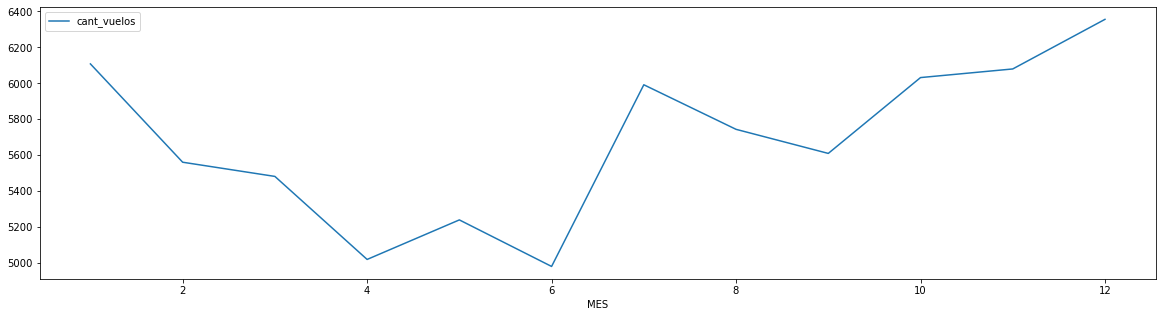

In [17]:
# plt.rcParams['figure.figsize'] = (6.4, 4.8)
plt.rcParams['figure.figsize'] = (20, 5)

pd.DataFrame(df.groupby('MES').size(), columns = ['cant_vuelos']).plot()
plt.show()

###  Cantidad de vuelos por mes y tipo de vuelo

In [18]:
g1 = df.groupby(['MES', 'TIPOVUELO']).size().unstack()
g1.head()

TIPOVUELO,I,N
MES,,
1,2805,3303
2,2499,3062
3,2496,2986
4,2354,2666
5,2428,2812


<AxesSubplot:xlabel='MES', ylabel='I'>

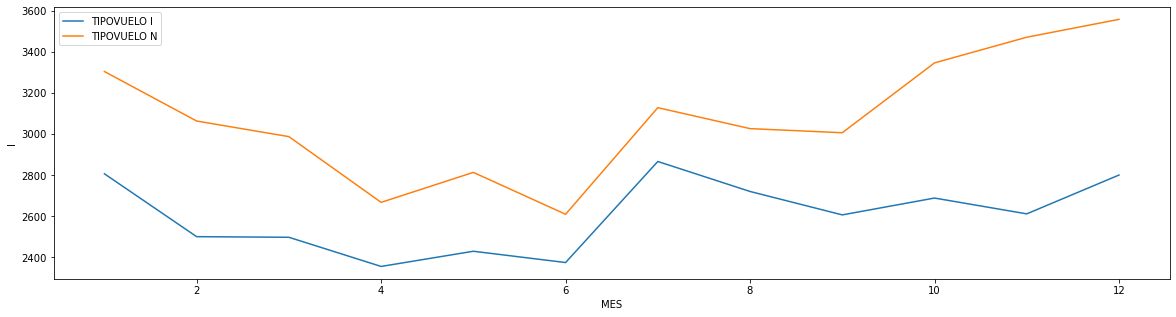

In [19]:
sb.lineplot(x = "MES", y = "I", data = g1, label = 'TIPOVUELO I')
sb.lineplot(x = "MES", y = "N", data = g1, label = 'TIPOVUELO N')

In [20]:
df.select_dtypes(include='O').describe()

,Vlo-I,Ori-I,Des-I,Emp-I,Vlo-O,Ori-O,Des-O,Emp-O,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
count,68206,68206,68206,68206,68205,68206,68206,68206,68206,68206,68206,68206,68206
unique,750,1,64,30,866,1,63,32,7,2,23,1,62
top,174,SCEL,SCFA,LAN,174,SCEL,SCFA,LAN,Viernes,N,Grupo LATAM,Santiago,Buenos Aires
freq,686,68206,5787,37611,649,68206,5786,20988,10292,36966,40892,68206,6335


In [21]:
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


### Des-I : Código de ciudad de destino programado

In [22]:
df['Des-I'].value_counts()

SCFA    5787
SPJC    5270
SCCF    5145
SCTE    4357
SCIE    3995
        ... 
SBFI       1
SLCB       1
SEQU       1
SEQM       1
SPSO       1
Name: Des-I, Length: 64, dtype: int64

In [23]:
df['Des-I'].value_counts().describe()

count      64.000000
mean     1065.718750
std      1496.220237
min         1.000000
25%        50.000000
50%       346.000000
75%      1609.250000
max      5787.000000
Name: Des-I, dtype: float64

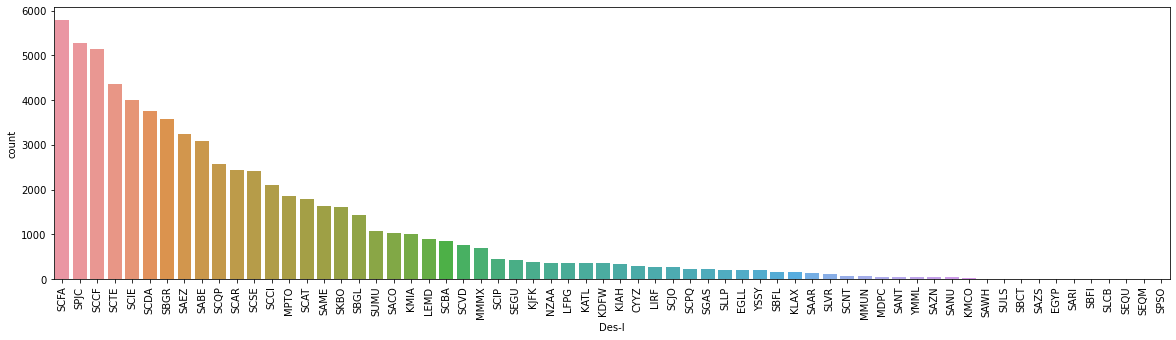

In [24]:
sb.countplot(x = "Des-I", data = df, order = df['Des-I'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

### Emp-I : Código aerolínea de vuelo programado

In [25]:
df['Emp-I'].value_counts()

LAN    37611
SKU    14298
TAM     3049
ARG     1949
CMP     1850
LAW     1574
AVA     1152
JAT     1095
GLO      806
AAL      757
ACA      565
IBE      362
AFR      358
DAL      358
AMX      351
UAL      335
ONE      279
AZA      259
KLM      251
LAP      216
BAW      205
QFU      195
JMR      100
LRC       92
AUT       74
PUE       49
LXP        9
LPE        4
DSM        2
LNE        1
Name: Emp-I, dtype: int64

In [26]:
df['Emp-I'].value_counts().describe()

count       30.000000
mean      2273.533333
std       7163.120100
min          1.000000
25%        123.750000
50%        343.000000
75%       1022.750000
max      37611.000000
Name: Emp-I, dtype: float64

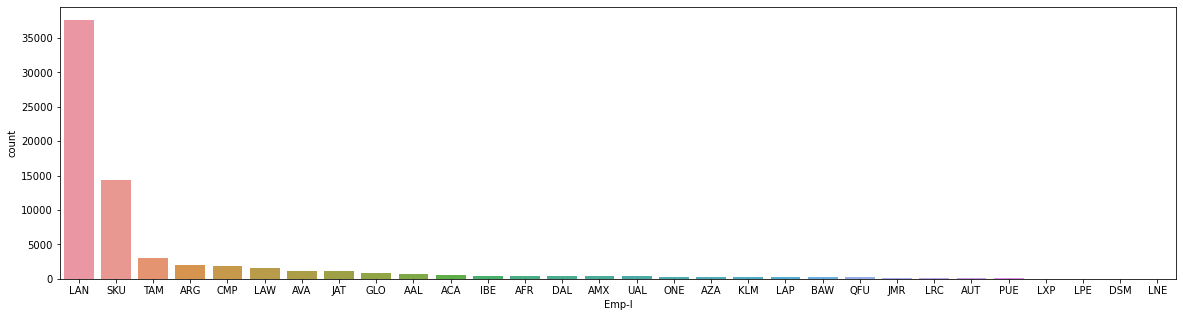

In [27]:
sb.countplot(x = "Emp-I", data = df, order = df['Emp-I'].value_counts().index)
plt.show()

### DIANOM : Día de la semana de operación del vuelo.

In [28]:
df['DIANOM'].value_counts()

Viernes      10292
Jueves       10251
Lunes        10131
Domingo       9796
Miercoles     9722
Martes        9662
Sabado        8352
Name: DIANOM, dtype: int64

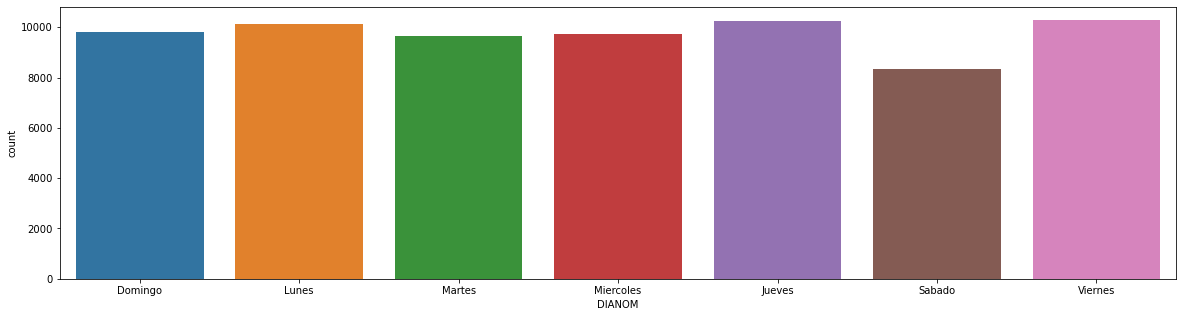

In [29]:
sb.countplot(x="DIANOM", data=df)
plt.show()

### TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.

In [30]:
df['TIPOVUELO'].value_counts()

N    36966
I    31240
Name: TIPOVUELO, dtype: int64

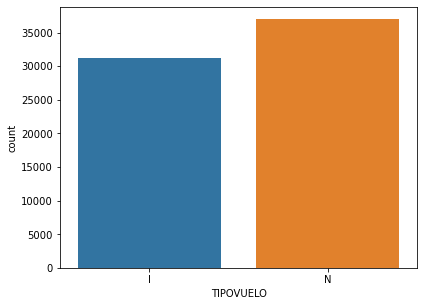

In [31]:
plt.rcParams['figure.figsize'] = (6.4, 4.8)

sb.countplot(x="TIPOVUELO", data=df)
plt.show()

### OPERA : Nombre de aerolínea que opera.

In [32]:
df['OPERA'].value_counts()

Grupo LATAM                 40892
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Delta Air                     358
Air France                    358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
Name: OPERA, dtype: int64

In [33]:
df['OPERA'].value_counts(normalize = True)

Grupo LATAM                 0.599537
Sky Airline                 0.209630
Aerolineas Argentinas       0.028575
Copa Air                    0.027124
Latin American Wings        0.024543
Avianca                     0.016890
JetSmart SPA                0.016054
Gol Trans                   0.011817
American Airlines           0.011099
Air Canada                  0.008284
Iberia                      0.005307
Delta Air                   0.005249
Air France                  0.005249
Aeromexico                  0.005146
United Airlines             0.004912
Oceanair Linhas Aereas      0.004091
Alitalia                    0.003797
K.L.M.                      0.003680
British Airways             0.003006
Qantas Airways              0.002859
Lacsa                       0.001349
Austral                     0.001085
Plus Ultra Lineas Aereas    0.000718
Name: OPERA, dtype: float64

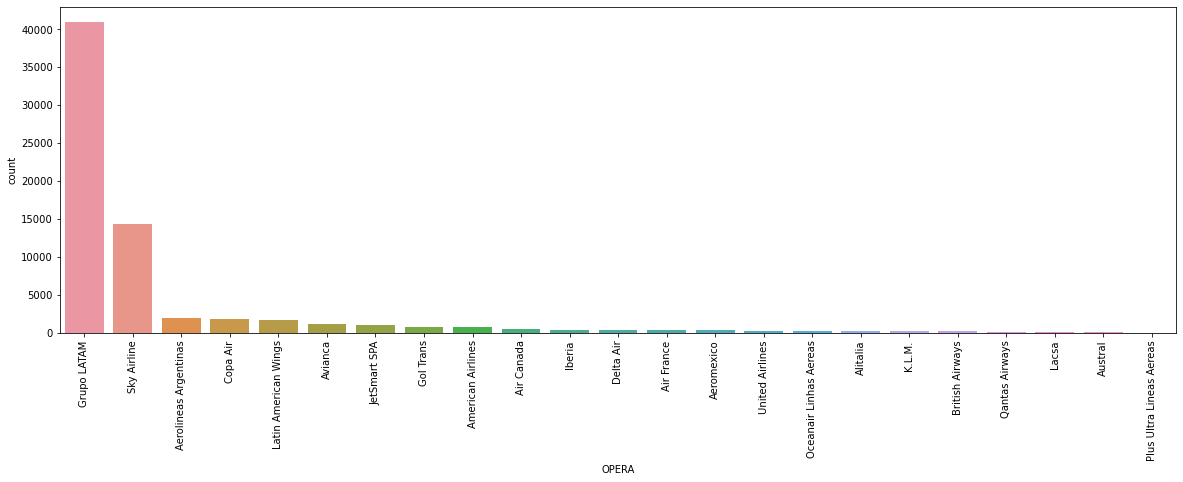

In [34]:
plt.rcParams['figure.figsize'] = (20, 6)

sb.countplot(x = "OPERA", data = df, order = df['OPERA'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

### SIGLADES : Nombre ciudad destino.

In [35]:
df['SIGLADES'].value_counts()

Buenos Aires      6335
Antofagasta       5786
Lima              5270
Calama            5146
Puerto Montt      4357
                  ... 
Bariloche            2
Pisco, Peru          1
Washington           1
Puerto Stanley       1
Cochabamba           1
Name: SIGLADES, Length: 62, dtype: int64

In [36]:
df['SIGLADES'].value_counts().describe()

count      62.000000
mean     1100.096774
std      1613.243080
min         1.000000
25%        56.250000
50%       345.500000
75%      1561.750000
max      6335.000000
Name: SIGLADES, dtype: float64

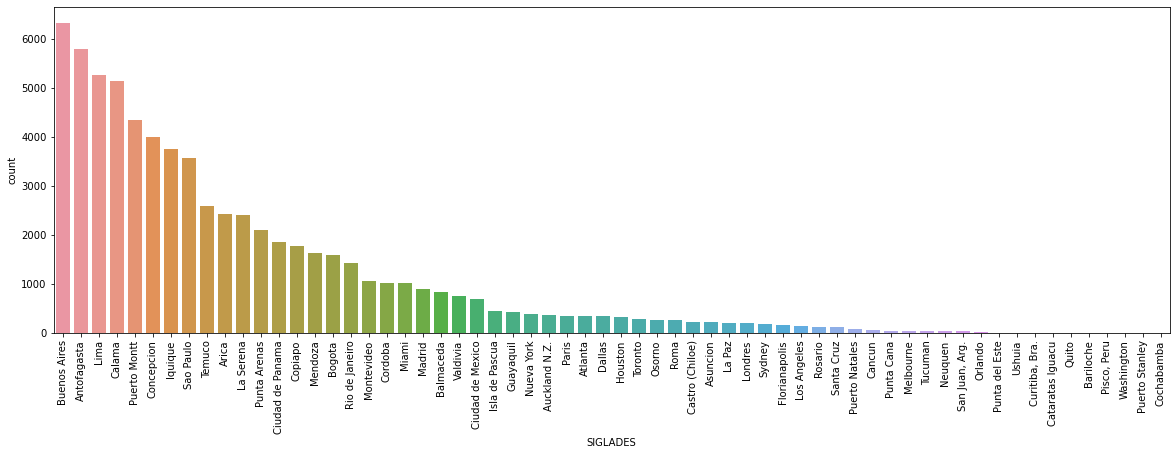

In [37]:
sb.countplot(x = "SIGLADES", data = df, order = df['SIGLADES'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

# 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv

### temporada_alta

In [38]:
import numpy as np

In [39]:
# df['temporada_alta'] = np.where((df['Fecha-I'] >= '2017-12-15') & (df['Fecha-I'] <= '2017-12-31') |
#                                 (df['Fecha-I'] >= '2017-09-11') & (df['Fecha-I'] <= '2017-09-30') |
#                                 (df['Fecha-I'] >= '2017-07-15') & (df['Fecha-I'] <= '2017-07-31') |
#                                 (df['Fecha-I'] >= '2017-01-01') & (df['Fecha-I'] <= '2017-03-03') , 1, 0)
# mala asignacion

#df['temporada_alta'].value_counts()
# 0    46174
# 1    22032

In [40]:
df['temporada_alta'] = np.where((df['Fecha-I2'] >= '2017-12-15') & (df['Fecha-I2'] <= '2017-12-31') |
                                (df['Fecha-I2'] >= '2017-09-11') & (df['Fecha-I2'] <= '2017-09-30') |
                                (df['Fecha-I2'] >= '2017-07-15') & (df['Fecha-I2'] <= '2017-07-31') |
                                (df['Fecha-I2'] >= '2017-01-01') & (df['Fecha-I2'] <= '2017-03-03') , 1, 0)

In [41]:
df['temporada_alta'].value_counts()

0    45444
1    22762
Name: temporada_alta, dtype: int64

### dif_min

In [42]:
df['dif_min'] = (df['Fecha-O'] - df['Fecha-I'])/ pd.Timedelta(minutes=1)

### atraso_15

In [43]:
df['atraso_15'] = np.where(df['dif_min'] > 15, 1, 0)

### periodo_dia

In [44]:
# df.set_index('Fecha-I').between_time('05:00:00','11:59:00').head(3)
# df.set_index('Fecha-I').between_time('12:00:00','18:59:00').head(3)
# df.set_index('Fecha-I').between_time('19:00:00','04:59:00').head(3)

In [45]:
# df.set_index('Fecha-I').between_time('05:00:00','11:59:00').shape
# df.set_index('Fecha-I').between_time('12:00:00','18:59:00').shape
# df.set_index('Fecha-I').between_time('19:00:00','04:59:00').shape

# df.set_index('Fecha-I').between_time('05:00:00','11:59:00').shape[0] +
# df.set_index('Fecha-I').between_time('12:00:00','18:59:00').shape[0] + 
# df.set_index('Fecha-I').between_time('19:00:00','04:59:00').shape[0]

In [46]:
Temp1 = df.set_index('Fecha-I').between_time('05:00:00','11:59:00')
Temp1['periodo_dia'] = "mañana"

Temp2 = df.set_index('Fecha-I').between_time('12:00:00','18:59:00')
Temp2['periodo_dia'] = "tarde"

Temp3 = df.set_index('Fecha-I').between_time('19:00:00','04:59:00')
Temp3['periodo_dia'] = "noche"

In [47]:
df2 = pd.concat([Temp1,Temp2,Temp3], 0)
df2.head()

,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,...,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Fecha-I2,temporada_alta,dif_min,atraso_15,periodo_dia
Fecha-I,,,,,,,,,,,,,,,,,,,,,
2017-01-01 10:35:00,1281,SCEL,SABE,ARG,2017-01-01 10:25:00,1281,SCEL,SABE,ARG,1,...,Domingo,I,Aerolineas Argentinas,Santiago,Buenos Aires,2017-01-01,1,-10.0,0,mañana
2017-01-02 10:35:00,1281,SCEL,SABE,ARG,2017-01-02 10:37:00,1281,SCEL,SABE,ARG,2,...,Lunes,I,Aerolineas Argentinas,Santiago,Buenos Aires,2017-01-02,1,2.0,0,mañana
2017-01-03 10:35:00,1281,SCEL,SABE,ARG,2017-01-03 10:33:00,1281,SCEL,SABE,ARG,3,...,Martes,I,Aerolineas Argentinas,Santiago,Buenos Aires,2017-01-03,1,-2.0,0,mañana
2017-01-04 10:35:00,1281,SCEL,SABE,ARG,2017-01-04 11:06:00,1281,SCEL,SABE,ARG,4,...,Miercoles,I,Aerolineas Argentinas,Santiago,Buenos Aires,2017-01-04,1,31.0,1,mañana
2017-01-05 10:35:00,1281,SCEL,SABE,ARG,2017-01-05 10:53:00,1281,SCEL,SABE,ARG,5,...,Jueves,I,Aerolineas Argentinas,Santiago,Buenos Aires,2017-01-05,1,18.0,1,mañana


In [48]:
df2.shape

(68206, 22)

In [49]:
df2.select_dtypes(include='O').describe()

,Vlo-I,Ori-I,Des-I,Emp-I,Vlo-O,Ori-O,Des-O,Emp-O,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,periodo_dia
count,68206,68206,68206,68206,68205,68206,68206,68206,68206,68206,68206,68206,68206,68206
unique,750,1,64,30,866,1,63,32,7,2,23,1,62,3
top,174,SCEL,SCFA,LAN,174,SCEL,SCFA,LAN,Viernes,N,Grupo LATAM,Santiago,Buenos Aires,tarde
freq,686,68206,5787,37611,649,68206,5786,20988,10292,36966,40892,68206,6335,25506


In [50]:
df2['periodo_dia'].value_counts()

tarde     25506
mañana    25352
noche     17348
Name: periodo_dia, dtype: int64

In [51]:
df2.describe()

,DIA,MES,AÑO,temporada_alta,dif_min,atraso_15
count,68206.000000,68206.000000,68206.000000,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029,0.333724,9.110855,0.184940
std,8.782886,3.523321,0.005415,0.471546,19.313387,0.388252
min,1.000000,1.000000,2017.000000,0.000000,-14.000000,0.000000
25%,8.000000,3.000000,2017.000000,0.000000,-1.000000,0.000000
50%,16.000000,7.000000,2017.000000,0.000000,4.000000,0.000000
75%,23.000000,10.000000,2017.000000,1.000000,12.000000,0.000000
max,31.000000,12.000000,2018.000000,1.000000,161.000000,1.000000


In [52]:
df2.to_csv('synthetic_features.csv', index = False)

# 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?, ¿Qué variables esperarías que más influyeran en predecir atrasos?

## tasa de atraso por destino

In [53]:
pd.DataFrame(df2.groupby(by=['Des-I'])['atraso_15'].mean()).head()

,atraso_15
Des-I,
CYYZ,0.314488
EGLL,0.141463
EGYP,1.000000
KATL,0.058659
KDFW,0.070028


In [54]:
g2 = pd.DataFrame(df2.groupby(by=['Des-I'], as_index = False)['atraso_15'].mean())
g2.head()

,Des-I,atraso_15
0,CYYZ,0.314488
1,EGLL,0.141463
2,EGYP,1.000000
3,KATL,0.058659
4,KDFW,0.070028


In [55]:
pd.DataFrame(df2.groupby(by=['Des-I'])['atraso_15'].mean()).describe()

,atraso_15
count,64.000000
mean,0.253194
std,0.234241
min,0.000000
25%,0.135833
50%,0.190316
75%,0.269350
max,1.000000


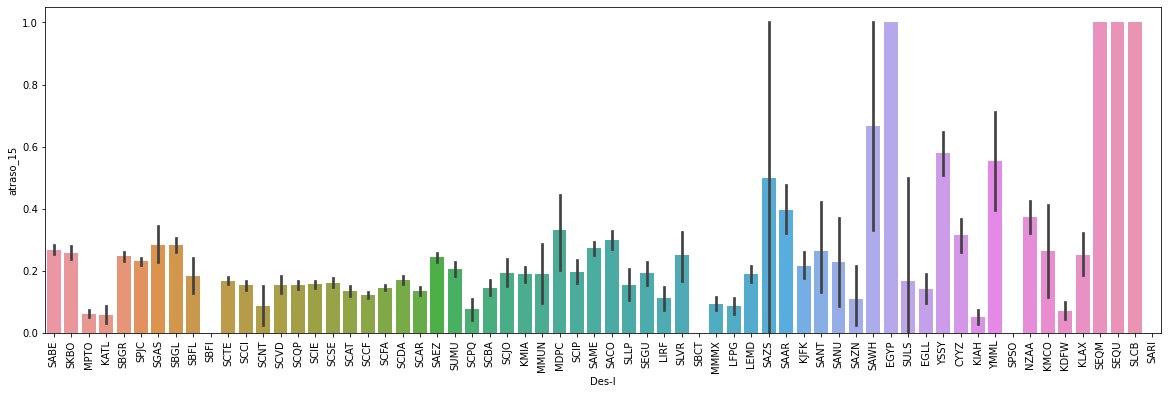

In [56]:
# plt.rcParams['figure.figsize'] = (6.4, 4.8)
plt.rcParams['figure.figsize'] = (20, 6)

sb.barplot(x = 'Des-I', y = 'atraso_15', data = df2)
plt.xticks(rotation = 90)
plt.show() # sin esto salen textos

## tasa de atraso por aereolinea

In [57]:
pd.DataFrame(df2.groupby(by=['Emp-I'])['atraso_15'].mean()).head()

,atraso_15
Emp-I,
AAL,0.067371
ACA,0.456637
AFR,0.083799
AMX,0.028490
ARG,0.240123


In [58]:
pd.DataFrame(df2.groupby(by=['Emp-I'])['atraso_15'].mean()).describe()

,atraso_15
count,30.000000
mean,0.297233
std,0.268218
min,0.028490
25%,0.102578
50%,0.190849
75%,0.403409
max,1.000000


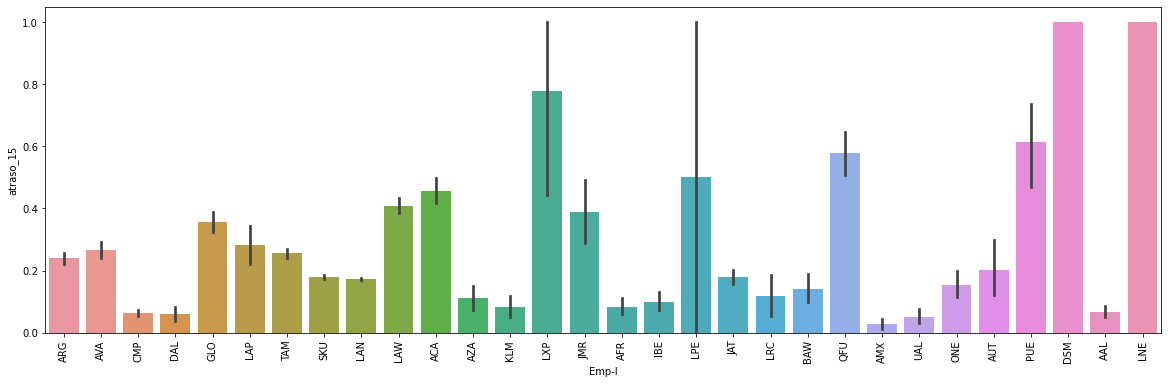

In [59]:
sb.barplot(x = 'Emp-I', y = 'atraso_15', data = df2)
plt.xticks(rotation = 90)
plt.show() # sin esto salen textos

## tasa de atraso por mes

In [60]:
pd.DataFrame(df2.groupby(by=['MES'])['atraso_15'].mean())

,atraso_15
MES,
1,0.160118
2,0.151591
3,0.115104
4,0.116534
5,0.157824
6,0.171050
7,0.293391
8,0.173398
9,0.172371


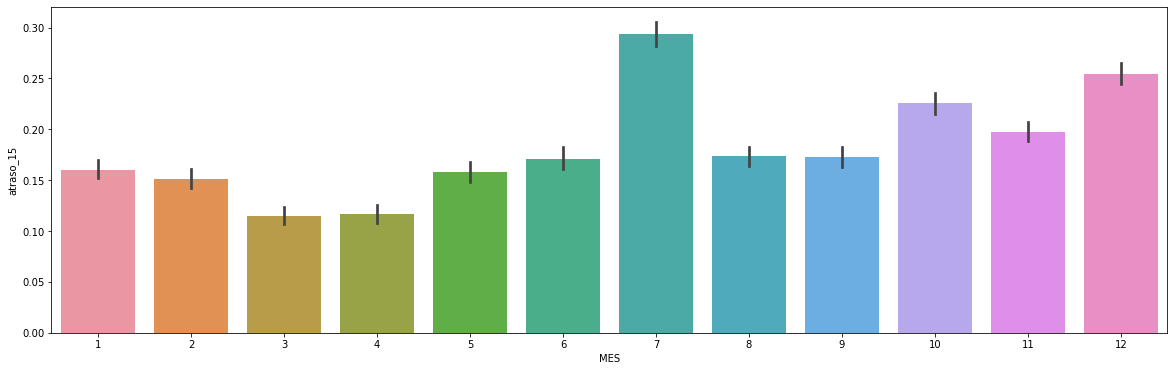

In [61]:
sb.barplot(x = 'MES', y = 'atraso_15', data = df2)
plt.xticks()
plt.show() 

## tasa de atraso por temporada_alta

In [62]:
pd.DataFrame(df2.groupby(by=['temporada_alta'])['atraso_15'].mean())

,atraso_15
temporada_alta,
0,0.17921
1,0.19638


## tasa de atraso por TIPOVUELO

In [63]:
pd.DataFrame(df2.groupby(by=['TIPOVUELO'])['atraso_15'].mean())

,atraso_15
TIPOVUELO,
I,0.225608
N,0.150571


# 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

In [64]:
df2['Vlo-I-O_DIFF'] = np.where(df2['Vlo-I'] == df2['Vlo-O'], 0, 1)
df2.head(3)

,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,...,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Fecha-I2,temporada_alta,dif_min,atraso_15,periodo_dia,Vlo-I-O_DIFF
Fecha-I,,,,,,,,,,,,,,,,,,,,,
2017-01-01 10:35:00,1281,SCEL,SABE,ARG,2017-01-01 10:25:00,1281,SCEL,SABE,ARG,1,...,I,Aerolineas Argentinas,Santiago,Buenos Aires,2017-01-01,1,-10.0,0,mañana,0
2017-01-02 10:35:00,1281,SCEL,SABE,ARG,2017-01-02 10:37:00,1281,SCEL,SABE,ARG,2,...,I,Aerolineas Argentinas,Santiago,Buenos Aires,2017-01-02,1,2.0,0,mañana,0
2017-01-03 10:35:00,1281,SCEL,SABE,ARG,2017-01-03 10:33:00,1281,SCEL,SABE,ARG,3,...,I,Aerolineas Argentinas,Santiago,Buenos Aires,2017-01-03,1,-2.0,0,mañana,0


In [65]:
df2['Vlo-I-O_DIFF'].value_counts()

0    66356
1     1850
Name: Vlo-I-O_DIFF, dtype: int64

In [66]:
df2['Des-I-O_DIFF'] = np.where(df2['Des-I'] == df2['Des-O'], 0, 1)
df2['Des-I-O_DIFF'].value_counts()

0    68178
1       28
Name: Des-I-O_DIFF, dtype: int64

In [67]:
df2['Emp-I-O_DIFF'] = np.where(df2['Emp-I'] == df2['Emp-O'], 0, 1)
df2['Emp-I-O_DIFF'].value_counts()

0    49537
1    18669
Name: Emp-I-O_DIFF, dtype: int64

## creacion dataframe X y Y

In [68]:
X = df2.drop(['Vlo-I','Ori-I','Des-I','Emp-I','Fecha-O','Vlo-O','Ori-O','Des-O','Emp-O','Fecha-I2'], 1)
X.head()

,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia,Vlo-I-O_DIFF,Des-I-O_DIFF,Emp-I-O_DIFF
Fecha-I,,,,,,,,,,,,,,,
2017-01-01 10:35:00,1,1,2017,Domingo,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,-10.0,0,mañana,0,0,0
2017-01-02 10:35:00,2,1,2017,Lunes,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,2.0,0,mañana,0,0,0
2017-01-03 10:35:00,3,1,2017,Martes,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,-2.0,0,mañana,0,0,0
2017-01-04 10:35:00,4,1,2017,Miercoles,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,31.0,1,mañana,0,0,0
2017-01-05 10:35:00,5,1,2017,Jueves,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,18.0,1,mañana,0,0,0


In [70]:
Y = df2[['atraso_15']]
Y.head()

,atraso_15
Fecha-I,
2017-01-01 10:35:00,0
2017-01-02 10:35:00,0
2017-01-03 10:35:00,0
2017-01-04 10:35:00,1
2017-01-05 10:35:00,1


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2022)

In [73]:
print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)

print("X_test.shape: ", X_test.shape)
print("Y_test.shape: ", Y_test.shape)

print("X_train %: ", len(X_train)/len(X))
print("X_test %: ", len(X_test)/len(X))

X_train.shape:  (54564, 15)
Y_train.shape:  (54564, 1)
X_test.shape:  (13642, 15)
Y_test.shape:  (13642, 1)
X_train %:  0.7999882708266135
X_test %:  0.2000117291733865


In [74]:
X_train.head(3)

,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia,Vlo-I-O_DIFF,Des-I-O_DIFF,Emp-I-O_DIFF
Fecha-I,,,,,,,,,,,,,,,
2017-01-12 20:50:00,12,1,2017,Jueves,I,Grupo LATAM,Santiago,Madrid,1,33.0,1,noche,0,0,0
2017-07-21 13:30:00,21,7,2017,Viernes,I,Qantas Airways,Santiago,Sydney,1,101.0,1,tarde,0,0,1
2017-04-24 14:35:00,24,4,2017,Lunes,N,Grupo LATAM,Santiago,Calama,0,2.0,0,tarde,0,0,1


In [75]:
X_train.reset_index(drop = True, inplace = True)
Y_train.reset_index(drop = True,inplace = True)
X_test.reset_index(drop = True,inplace = True)
Y_test.reset_index(drop = True,inplace = True)

In [76]:
X_train.head(3)

,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia,Vlo-I-O_DIFF,Des-I-O_DIFF,Emp-I-O_DIFF
0,12,1,2017,Jueves,I,Grupo LATAM,Santiago,Madrid,1,33.0,1,noche,0,0,0
1,21,7,2017,Viernes,I,Qantas Airways,Santiago,Sydney,1,101.0,1,tarde,0,0,1
2,24,4,2017,Lunes,N,Grupo LATAM,Santiago,Calama,0,2.0,0,tarde,0,0,1


# 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?